In [3]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('smsspamcollection.tsv',sep = '\t')

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
df.isnull().sum() # Checks if there is any missing value. Since no null values are present, it means that there is nothing missing and the dataset which we have is complete

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
len(df)

5572

In [14]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [15]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
df['label'].count() # Will tell the overall count of the variables present in the dataframe

5572

In [19]:
df['label'].value_counts() # Will tell the count of each class variable individually

ham     4825
spam     747
Name: label, dtype: int64

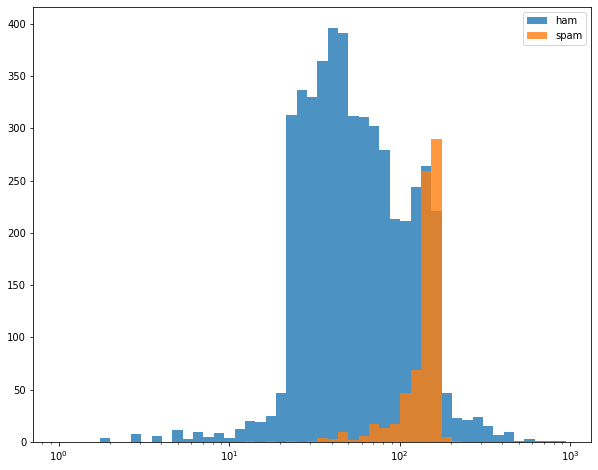

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,8))
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

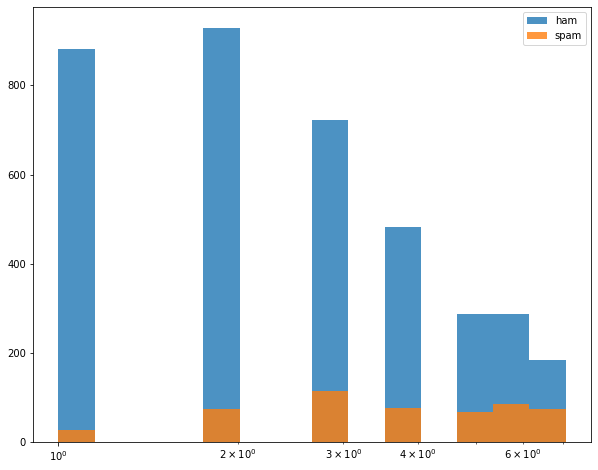

In [25]:
plt.figure(figsize = (10,8))
plt.xscale('log')
bins = 1.15**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
# X - Feature Data, y - Label
X = df[['length','punct']]
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [27]:
X_train.shape

(3900, 2)

In [28]:
X_test.shape

(1672, 2)

In [30]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')

In [33]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn import metrics
predictions = lr_model.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [38]:
metrics.confusion_matrix(y_test,predictions)

array([[1404,   44],
       [ 219,    5]], dtype=int64)

In [42]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df # The logistic regression model does not identify spam messages very accurately

,ham,spam
ham,1404,44
spam,219,5


In [43]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [44]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [45]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions)) 

[[1438   10]
 [ 224    0]]


In [46]:
print(metrics.classification_report(y_test,predictions)) # The naive bayes model fails to identify spam messages

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [48]:
from sklearn.svm import SVC
svc_model = SVC(gamma = 'auto')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions)) # The support vector machine model performs good

[[1373   75]
 [ 121  103]]
